# WeatherPy
_____________________________________________________________________________________________
Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Denpendencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import requests

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities the cities based on latitude and Longitude
from citipy import citipy

# Generate the Cities List by Using the citipy Library

In [2]:
#Empty list for holding the Latitude and Langitude combinations 
lat_lngs = []

#Empty list for holding the cities names
cities = []

#Range of Latitudes ad Longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#Create a set of random Lat and Lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size = 1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size = 1500)
lat_lngs = zip(lats, lngs)

#Identify nearest city for each lat and lng combinations
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to our cities list 
    if city not in cities:
        cities.append(city)

#Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 601


# Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude
## Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [9]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&"

#Define an empty list to fetch the weather data for each city 
city_data =[]

#Print to logger
print("Beginning Data Retrieval         ")
print("---------------------------------")

#create counters
record_count = 1
set_count = 1

#Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    #Group cities in sets of 50 for logging  purposes
    if (i % 50 == 0 and i >=50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city 
    city_url = f"{url}appid={weather_api_key}&q={city}"

    #Log the url, record, and set numbers
    # print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    #Add 1 to the record count
    record_count +=1

    #Run an API reques for each of the cities 
    try:
        #Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        #Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather ['dt']
        city_ID = city_weather ['weather'][0]['id']

        #Append the City information into city_data list 
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
        #If an error is experienced, skip the city                   
    except:
        print("City not found. Skipping...")
        pass

        time.sleep(1)

# Indicate that Data Loading is complete
print("------------------------------")
print("Data Retrieval Complete       ")
print("------------------------------")

 

Beginning Data Retrieval         
---------------------------------
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
------------------------------
Data Retrieval Complete       
------------------------------


In [12]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

#Show the record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [13]:
#Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,3.09,93,100,9.89,TF,1723774654
1,tiksi,71.6872,128.8694,14.29,48,35,7.47,RU,1723774654
2,bilibino,68.0546,166.4372,2.04,100,100,2.94,RU,1723774655
3,tsarevo,42.1667,27.8500,20.38,79,0,0.81,BG,1723774655
4,papatowai,-46.5619,169.4708,6.46,87,100,3.50,NZ,1723774656


# Create the Scatter Plots Requested
## Latitude Vs. Temperature

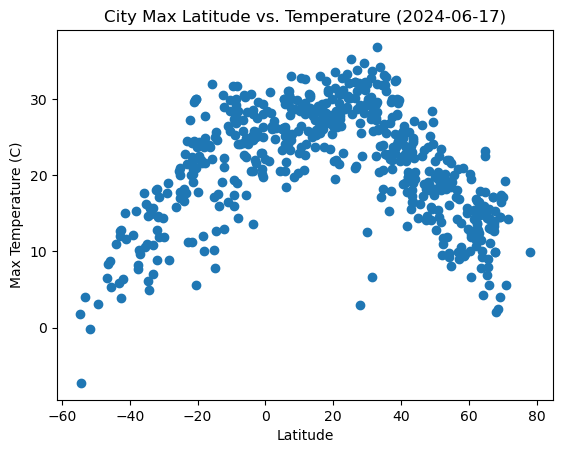

In [15]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]

#Plot scatter 
plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2024-06-17)")

plt.savefig("output_data/Fig1.png")
plt.show()


Latitude Vs. Humidity

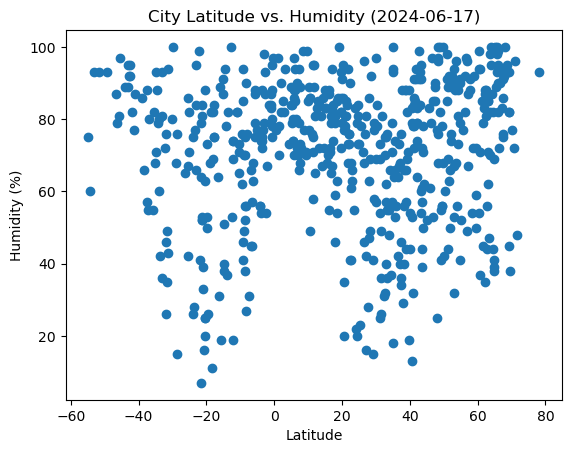

In [16]:
#Build the scatter plots for Latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]

plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2024-06-17)")

plt.savefig("output_data/Fig2.png")

plt.show()


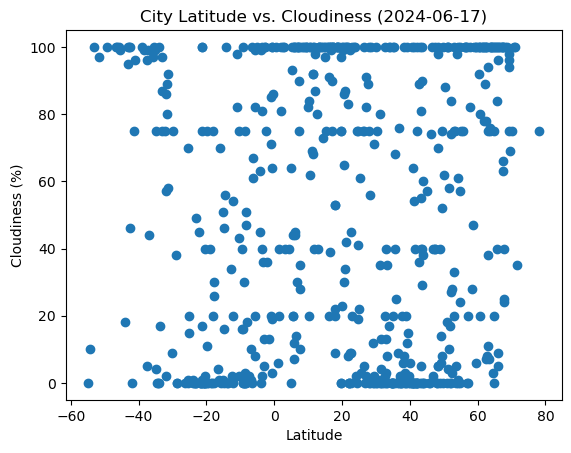

In [17]:
#Build the scatter plots for Latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]

plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2024-06-17)")

plt.savefig("output_data/Fig3.png")

plt.show()


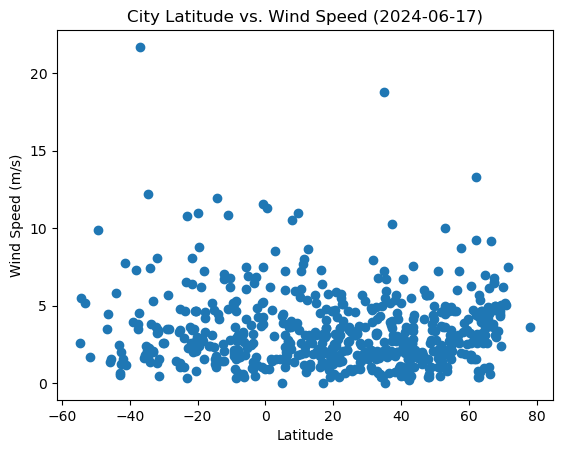

In [18]:
#Build the scatter plots for Latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]

plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2024-06-17)")

plt.savefig("output_data/Fig4.png")

plt.show()

---

## Requirements 2: Compute Linear Regression for Each Relationship

In [30]:
#Define a function to create a Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))

In [54]:
#Create a DataFrame with the Northern Hemisphere data (Latitude >=0)
northern_hemi_df = city_data_df[city_data_df ["Lat"] >= 0]
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,tiksi,71.6872,128.8694,14.29,48,35,7.47,RU,1723774654
2,bilibino,68.0546,166.4372,2.04,100,100,2.94,RU,1723774655
3,tsarevo,42.1667,27.8500,20.38,79,0,0.81,BG,1723774655
6,huicheng,23.0385,116.2899,30.84,66,100,5.10,CN,1723774656
8,badger,64.8000,-147.5333,23.14,39,0,3.60,US,1723774656


In [55]:
#Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df ["Lat"] <0]
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,3.09,93,100,9.89,TF,1723774654
4,papatowai,-46.5619,169.4708,6.46,87,100,3.50,NZ,1723774656
5,lebu,-37.6167,-73.6500,7.73,88,5,3.79,CL,1723774656
7,ushuaia,-54.8000,-68.3000,1.81,75,0,2.57,AR,1723774656
11,east london,-33.0153,27.9116,15.64,36,97,2.03,ZA,1723774656


r^2 value is: 0.5233095579680326


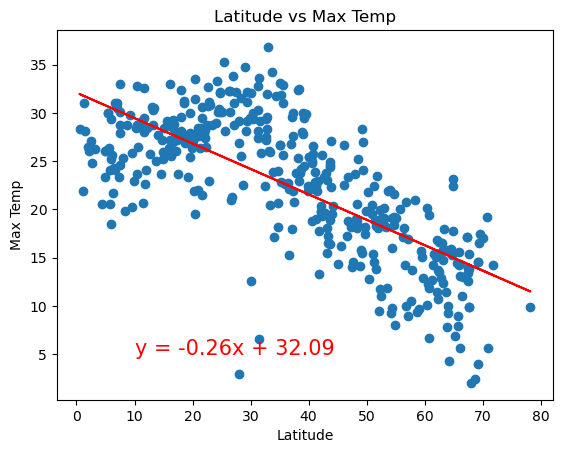

In [56]:
#Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs Max Temp")

#Plot regression Line
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq, (10,5), fontsize=15, color="red")

#Print r square value
print(f"r^2 value is: {rvalue**2}")

plt.show()


r^2 value is: 0.5739849807498394


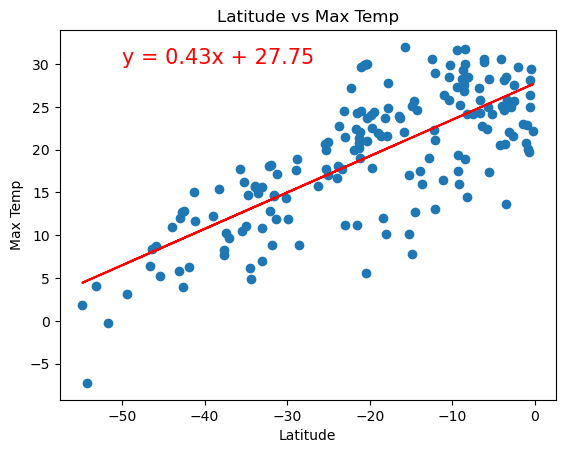

In [57]:
#Linear regression on Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs Max Temp")

#Plot regression Line
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq, (-50,30), fontsize=15, color="red")

#Print r square value
print(f"r^2 value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

r^2 value is: 3.780038967794584e-05


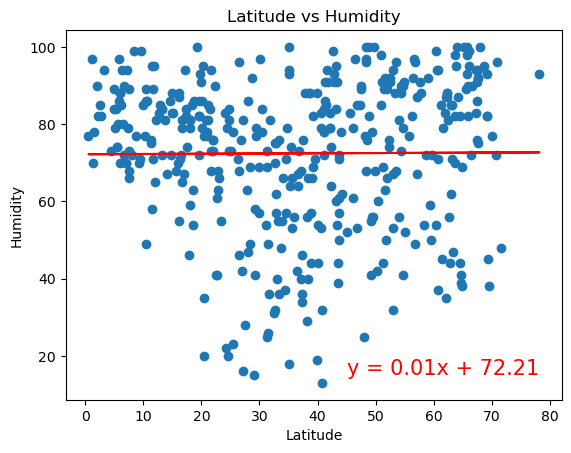

In [63]:
#Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity")

#Plot regression Line
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq, (45,15), fontsize=15, color="red")

#Print r square value
print(f"r^2 value is: {rvalue**2}")

plt.show()

r^2 value is: 0.00910417302737642


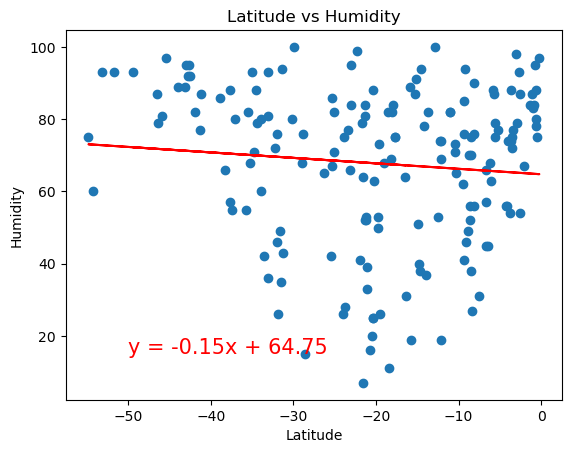

In [65]:
#Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity")

#Plot regression Line
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq, (-50,15), fontsize=15, color="red")

#Print r square value
print(f"r^2 value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

r^2 value is: 0.0008658875963891789


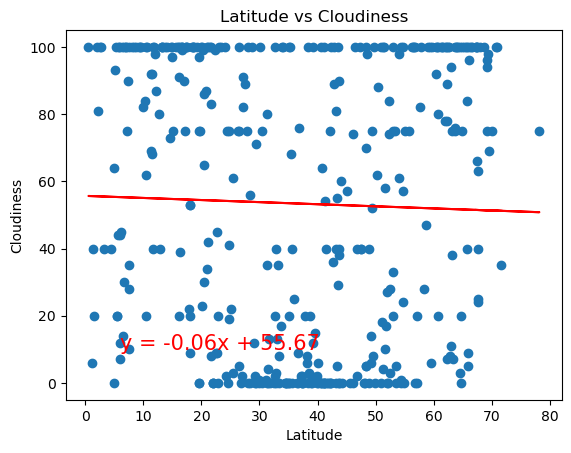

In [71]:
#Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness")

#regression plot
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (6,10), fontsize = 15, color="red")

#Label plot
print(f"r^2 value is: {rvalue**2}")

#Show plot
plt.show()


r^2 value is: 0.04186500225441605


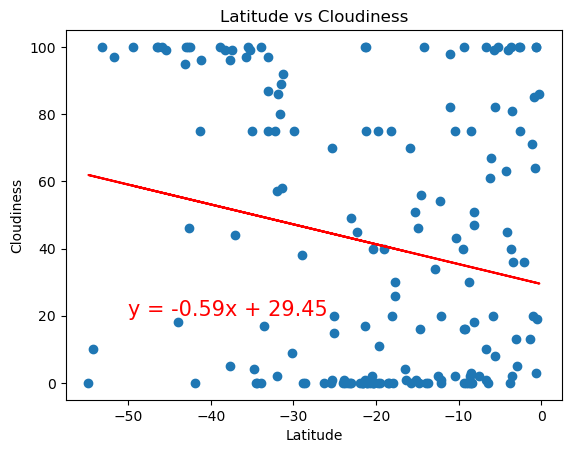

In [73]:
#Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness")

#regression plot
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-50,20), fontsize = 15, color="red")

#Label plot
print(f"r^2 value is: {rvalue**2}")

#Show plot
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

r^2 value is: 0.004801625779464866


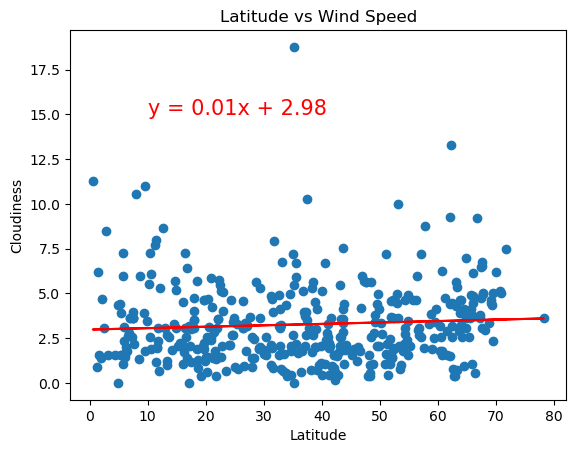

In [75]:
#Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Wind Speed")

#regression plot
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (10,15), fontsize = 15, color="red")

#Label plot
print(f"r^2 value is: {rvalue**2}")

#Show plot
plt.show()


r^2 value is: 0.0015751939528186045


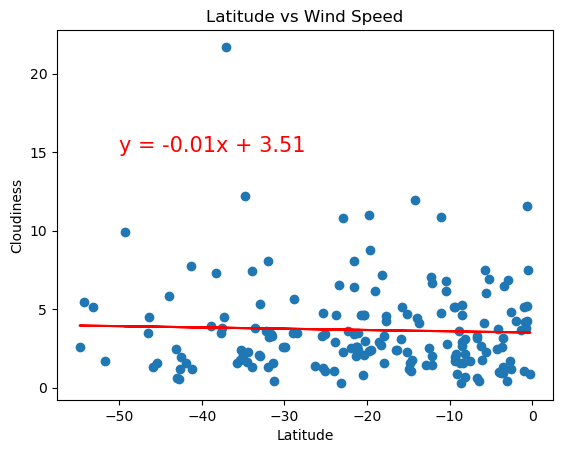

In [78]:
#Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Wind Speed")

#regression plot
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-50,15), fontsize = 15, color="red")

#Label plot
print(f"r^2 value is: {rvalue**2}")

#Show plot
plt.show()